In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# splitting data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler


In [3]:
data = pd.read_csv(r"C:\Users\anasw\Downloads\Breast Cancer Data.csv")
df = pd.DataFrame(data)

df.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df['texture_worst'].isnull().sum()

0

In [7]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

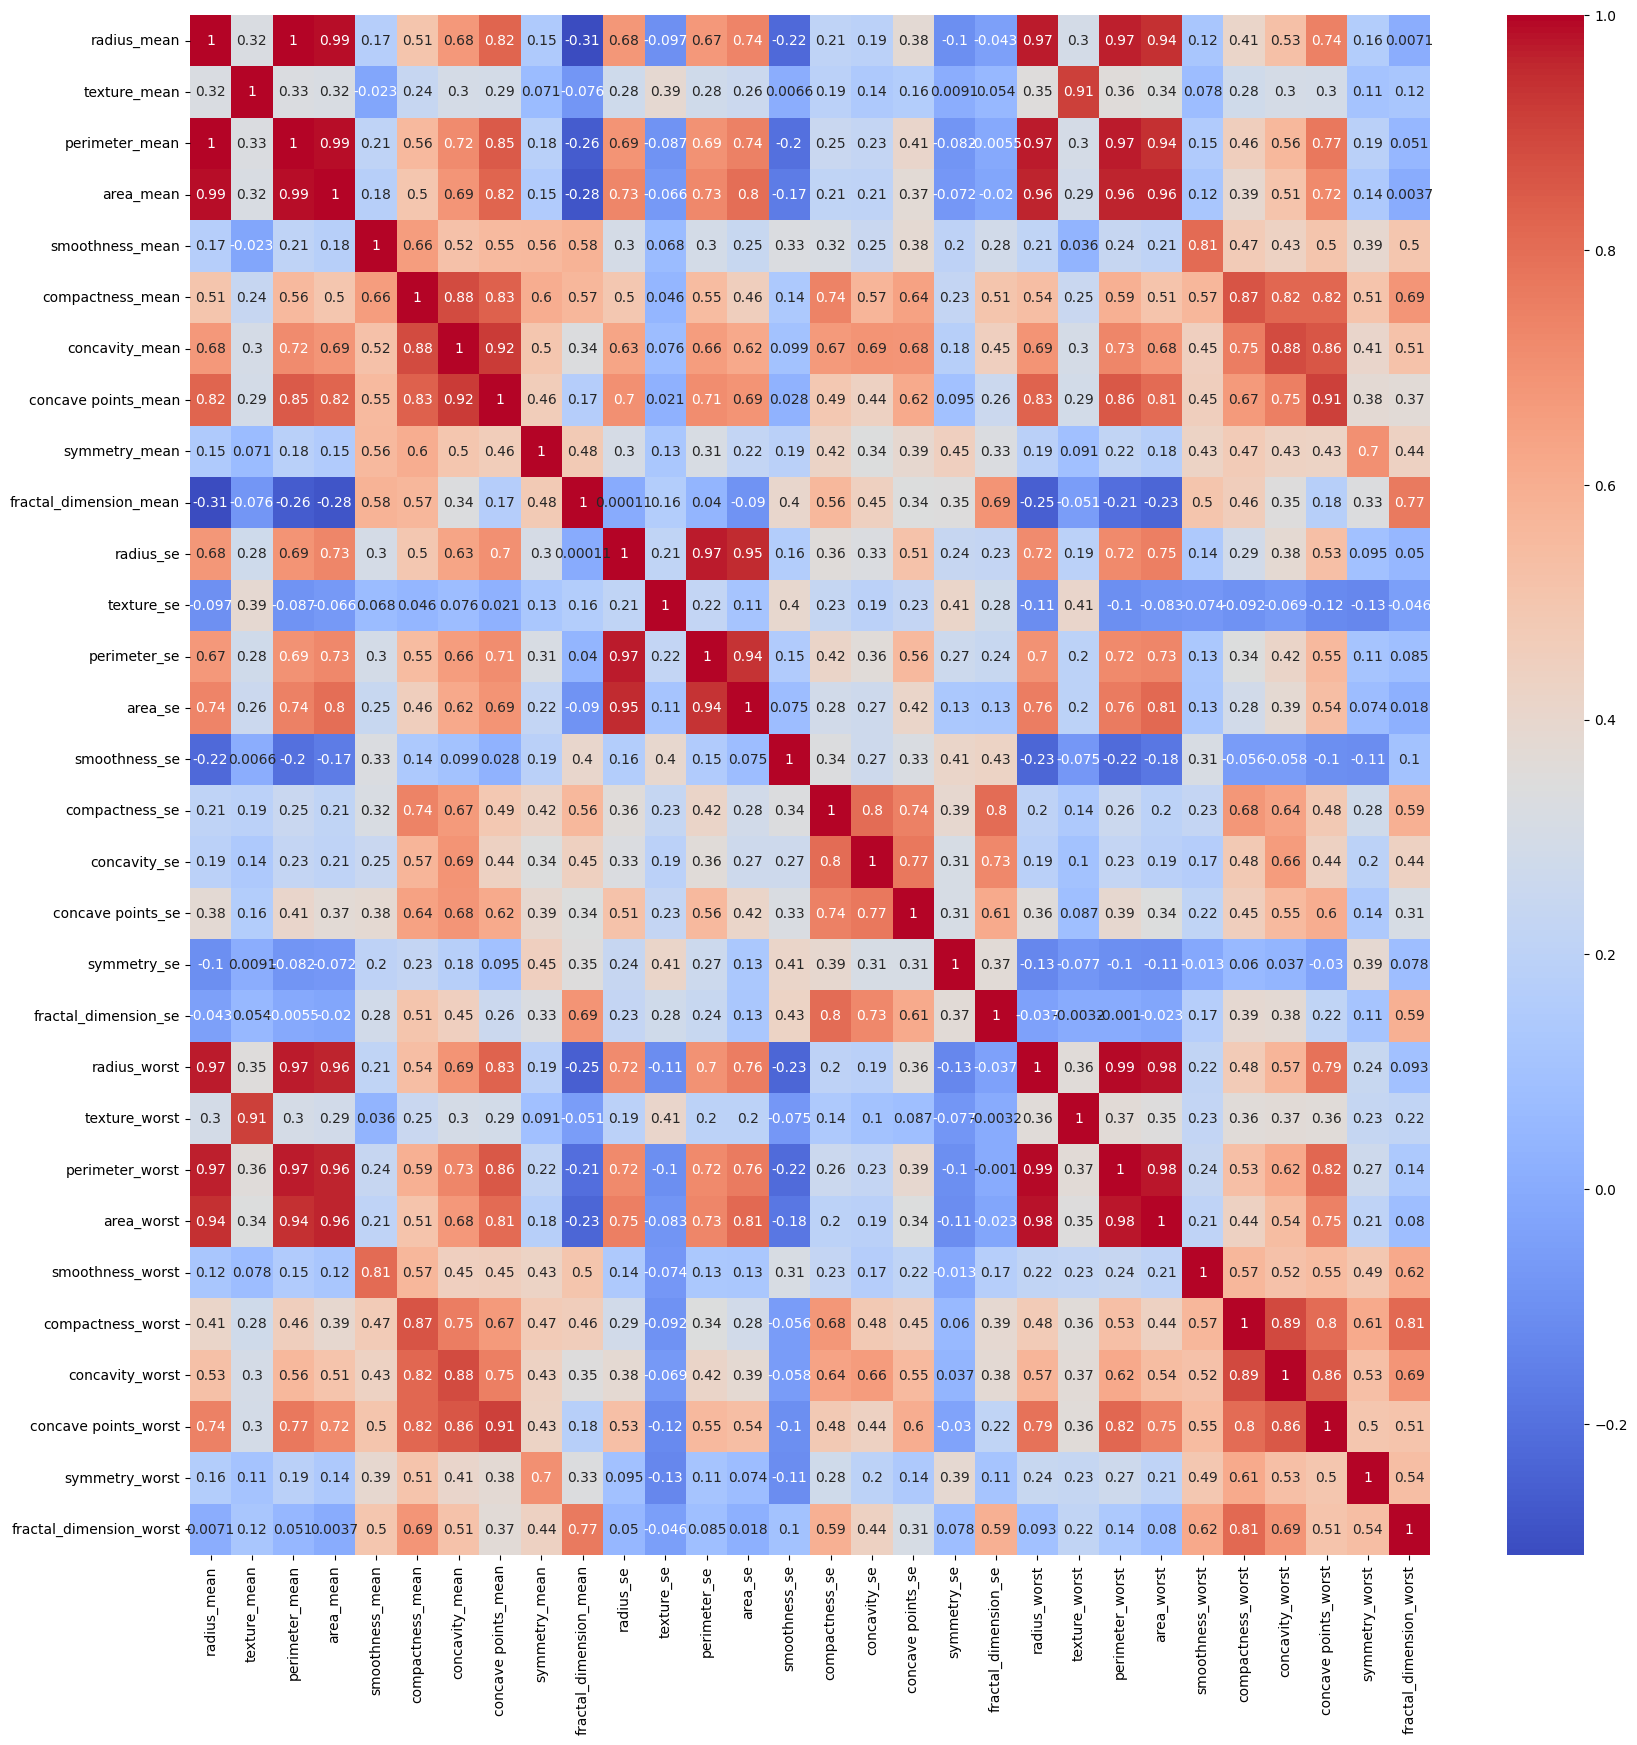

In [8]:
select_columns = df.select_dtypes( 'float64')

plt.figure(figsize=((20,20)))
sns.heatmap( select_columns.corr() , annot=True , cmap='coolwarm')
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df["diagnosis"] = label_encoder.fit_transform(df["diagnosis"])

In [10]:
X = df.drop(["id" , "diagnosis"], axis=1)
Y = df["diagnosis"]

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=30
)

In [11]:
print("Training set Shape: ", X_train.shape)
print("Test set Shape: ", X_test.shape)

print("Training set distribution:")
print(f'Avg: {y_train.mean()}, SD: {y_train.std()}')

print("Test set distribution:")
print(f'Avg: {y_test.mean()}, SD: {y_test.std()}')

Training set Shape:  (398, 30)
Test set Shape:  (171, 30)
Training set distribution:
Avg: 0.3768844221105528, SD: 0.4852155164865792
Test set distribution:
Avg: 0.36257309941520466, SD: 0.48215489234609893


In [12]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [14]:
model.score(X_train, y_train) # r2 score

1.0

In [13]:
model.score(X_test, y_test) # r2 score

0.7216632139686296

In [15]:
# function to compute adjusted R-squared -- extra step

def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

def calc_metric_score(X, y_train, y_pred):
    # Error Metrics - low
    print("mean absolute error:",mean_absolute_error(y_train,y_pred))
    print("root mean squared error:",np.sqrt(mean_squared_error(y_train,y_pred)))

    # Accuracy metrics - high
    print("r2-score:",r2_score(y_train,y_pred))
    print("adj-r2 score:", adj_r2_score(X, y_train, y_pred))

In [16]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Choose the type of regressor.
clf = DecisionTreeRegressor()

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(3, 10, 1),
    "max_leaf_nodes": [50, 75, 150, 250, 300],
    "min_samples_split": [10, 20, 30, 50, 70, 100]
}

# Run the grid search
_grid_obj = GridSearchCV(clf, parameters, cv=5, verbose = 1)
_grid_obj = _grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
grid_clf = _grid_obj.best_estimator_

print(grid_clf)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
DecisionTreeRegressor(max_depth=5, max_leaf_nodes=150, min_samples_split=70)


In [17]:
grid_clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=150, min_samples_split=70)

In [18]:
calc_metric_score(X_train, y_train, grid_clf.predict(X_train))

mean absolute error: 0.05410826060125187
root mean squared error: 0.16448139803827647
r2-score: 0.8847988587059046
adj-r2 score: 0.8753818716791393


In [19]:
calc_metric_score(X_test, y_test, grid_clf.predict(X_test))

mean absolute error: 0.07378167641325536
root mean squared error: 0.23679469751885446
r2-score: 0.7573848148782729
adj-r2 score: 0.7053958466379029


In [20]:
# Choose the type of regressor.
clf = DecisionTreeRegressor()

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(3, 10, 1),
    "max_leaf_nodes": [50, 75, 150, 250, 300],
    "min_samples_split": [10, 20, 30, 50, 70, 100]
}

# Run the randomized search
_grid_obj = RandomizedSearchCV(clf, parameters, cv=5, n_iter = 50, verbose = 1)
_grid_obj = _grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
random_clf = _grid_obj.best_estimator_

print(random_clf)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
DecisionTreeRegressor(max_depth=5, max_leaf_nodes=50, min_samples_split=100)


In [21]:
random_clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=50, min_samples_split=100)

In [22]:
calc_metric_score(X_train, y_train, random_clf.predict(X_train))

mean absolute error: 0.05410826060125187
root mean squared error: 0.16448139803827647
r2-score: 0.8847988587059046
adj-r2 score: 0.8753818716791393


In [23]:
calc_metric_score(X_test, y_test, random_clf.predict(X_test))

mean absolute error: 0.07378167641325536
root mean squared error: 0.23679469751885446
r2-score: 0.7573848148782729
adj-r2 score: 0.7053958466379029


In [25]:
clf = DecisionTreeRegressor()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [26]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.001245,0.004980
2,0.001675,0.006655
3,0.001675,0.008331
4,0.002198,0.010529
5,0.002266,0.015062
6,0.002492,0.017554
7,0.002722,0.020276
8,0.002948,0.026171
9,0.007182,0.033353


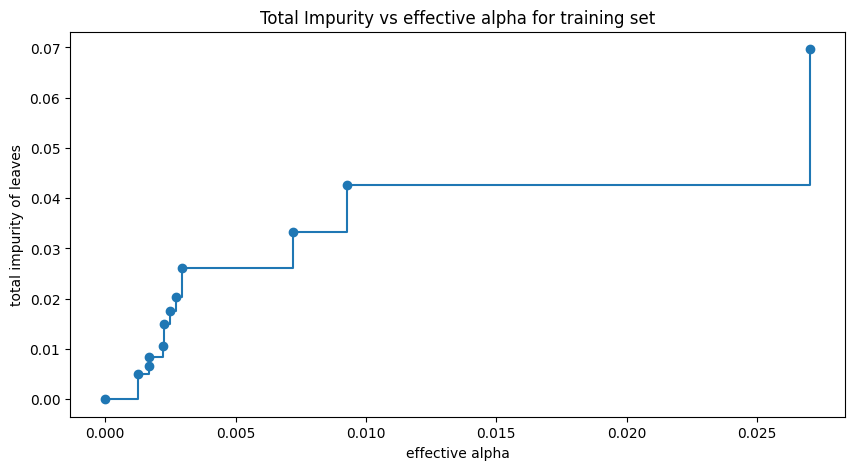

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [28]:
# Please note that this step may take significant amount of time (1-2 hrs)
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(
        ccp_alpha=ccp_alpha
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.16520212826962327


In [29]:
r_squared_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    r2_train = r2_score(y_train, pred_train)
    r_squared_train.append(r2_train)

In [30]:
r_squared_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    r2_test = r2_score(y_test, pred_test)
    r_squared_test.append(r2_test)

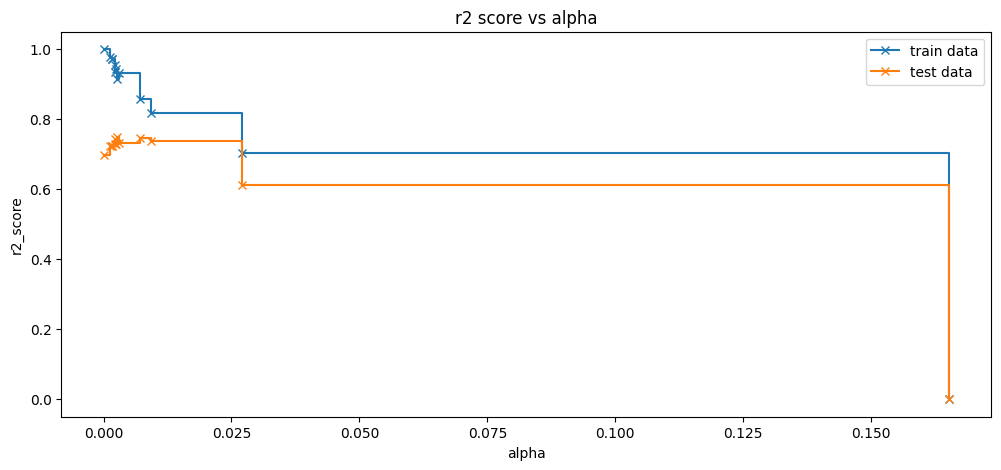

In [31]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("r2_score")
ax.set_title("r2 score vs alpha")
ax.plot(ccp_alphas, r_squared_train, marker="x", label="train data", drawstyle="steps-post")
ax.plot(ccp_alphas, r_squared_test, marker="x", label="test data", drawstyle="steps-post")
ax.legend()
plt.show()

In [32]:
# creating the model where we get highest train and test r2 score
index_best_model = np.argmax(r_squared_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeRegressor(ccp_alpha=0.0027219430485762143)


In [33]:
calc_metric_score(X_train, y_train, best_model.predict(X_train))

mean absolute error: 0.04055115766942477
root mean squared error: 0.1423923412080593
r2-score: 0.9136630970501672
adj-r2 score: 0.9066055845474561


In [34]:
calc_metric_score(X_test, y_test, best_model.predict(X_test))

mean absolute error: 0.07594716239560058
root mean squared error: 0.24142352972038522
r2-score: 0.7478068862583337
adj-r2 score: 0.6937655047422624


In [35]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        [np.sqrt(mean_squared_error(y_train, grid_clf.predict(X_train))), 
         r2_score(y_train, grid_clf.predict(X_train)),
        adj_r2_score(X_train, y_train, grid_clf.predict(X_train))],
        
         [np.sqrt(mean_squared_error(y_train, random_clf.predict(X_train))), 
         r2_score(y_train, random_clf.predict(X_train)),
        adj_r2_score(X_train, y_train, random_clf.predict(X_train))],
        
         [np.sqrt(mean_squared_error(y_train, best_model.predict(X_train))), 
         r2_score(y_train, best_model.predict(X_train)),
        adj_r2_score(X_train, y_train, best_model.predict(X_train))],
    ]
, columns=['RMSE', 'r2 score', 'adj_r_squared']).T
models_train_comp_df.columns = [
    "Decision Tree with grid search",
    "Decision Tree with random search",
    "Decision Tree with post pruning",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree with grid search,Decision Tree with random search,Decision Tree with post pruning
RMSE,0.164481,0.164481,0.142392
r2 score,0.884799,0.884799,0.913663
adj_r_squared,0.875382,0.875382,0.906606


In [36]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        [np.sqrt(mean_squared_error(y_test, grid_clf.predict(X_test))), 
         r2_score(y_test, grid_clf.predict(X_test)),
        adj_r2_score(X_test, y_test, grid_clf.predict(X_test))],
        
         [np.sqrt(mean_squared_error(y_test, random_clf.predict(X_test))), 
         r2_score(y_test, random_clf.predict(X_test)),
        adj_r2_score(X_test, y_test, random_clf.predict(X_test))],
        
         [np.sqrt(mean_squared_error(y_test, best_model.predict(X_test))), 
         r2_score(y_test, best_model.predict(X_test)),
        adj_r2_score(X_test, y_test, best_model.predict(X_test))],
    ]
, columns=['RMSE', 'r2 score', 'adj_r_squared']).T
models_test_comp_df.columns = [
    "Decision Tree with grid search",
    "Decision Tree with random search",
    "Decision Tree with post pruning",
]
print("testing performance comparison:")
models_test_comp_df

testing performance comparison:


,Decision Tree with grid search,Decision Tree with random search,Decision Tree with post pruning
RMSE,0.236795,0.236795,0.241424
r2 score,0.757385,0.757385,0.747807
adj_r_squared,0.705396,0.705396,0.693766


RMSE (Root Mean Squared Error):

Grid Search and Random Search: Both have the same RMSE of 0.236795, indicating a better fit compared to post-pruning.
Post Pruning: Slightly higher RMSE of 0.241424, indicating a marginally poorer fit.
R² Score:

Grid Search and Random Search: Both achieve an R² score of 0.757385, suggesting that these methods explain the same proportion of variance in the data.
Post Pruning: Slightly lower R² score of 0.747807, indicating that it explains slightly less variance compared to grid and random search.
Adjusted R² Score:

Grid Search and Random Search: Both have an adjusted R² score of 0.705396, showing better performance when adjusting for the number of predictors.
Post Pruning: Lower adjusted R² score of 0.693766, indicating a slightly reduced explanatory power when accounting for model complexity.
Summary
Grid Search and Random Search show identical and slightly better performance across all metrics compared to Post Pruning.
Post Pruning results in a marginally higher RMSE and lower R² and adjusted R² scores, suggesting a slightly less optimal model fit.

In [38]:
importances = grid_clf.feature_importances_
indices = np.argsort(importances)

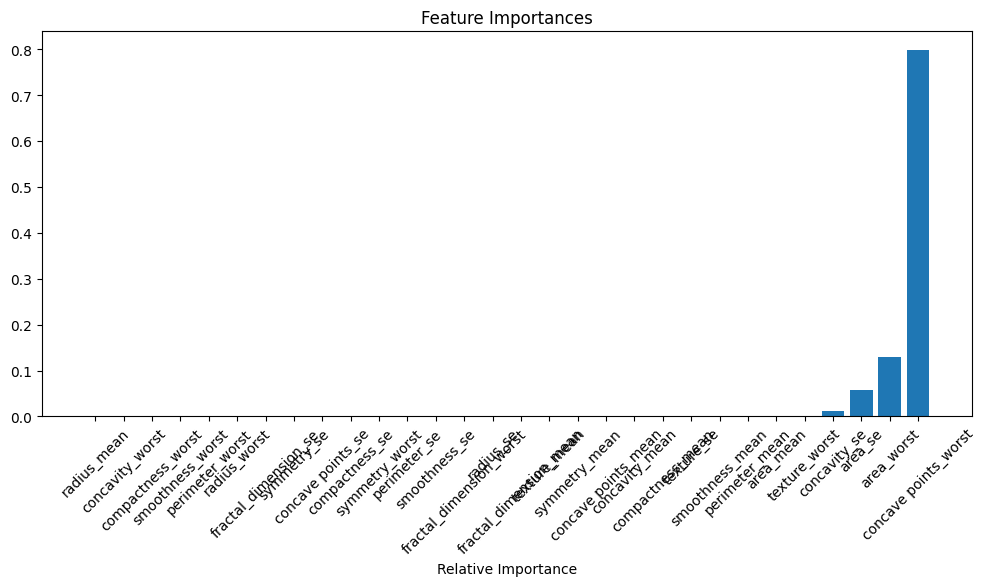

In [39]:
plt.figure(figsize=(12, 5))
plt.title("Feature Importances")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), [X_train.columns[i] for i in indices], rotation = 45)
plt.xlabel("Relative Importance")
plt.show()

The important features of the decision tree include: 

1. area_worst.
2. area_se. 
3. concavity_se.
4. texture_worst.

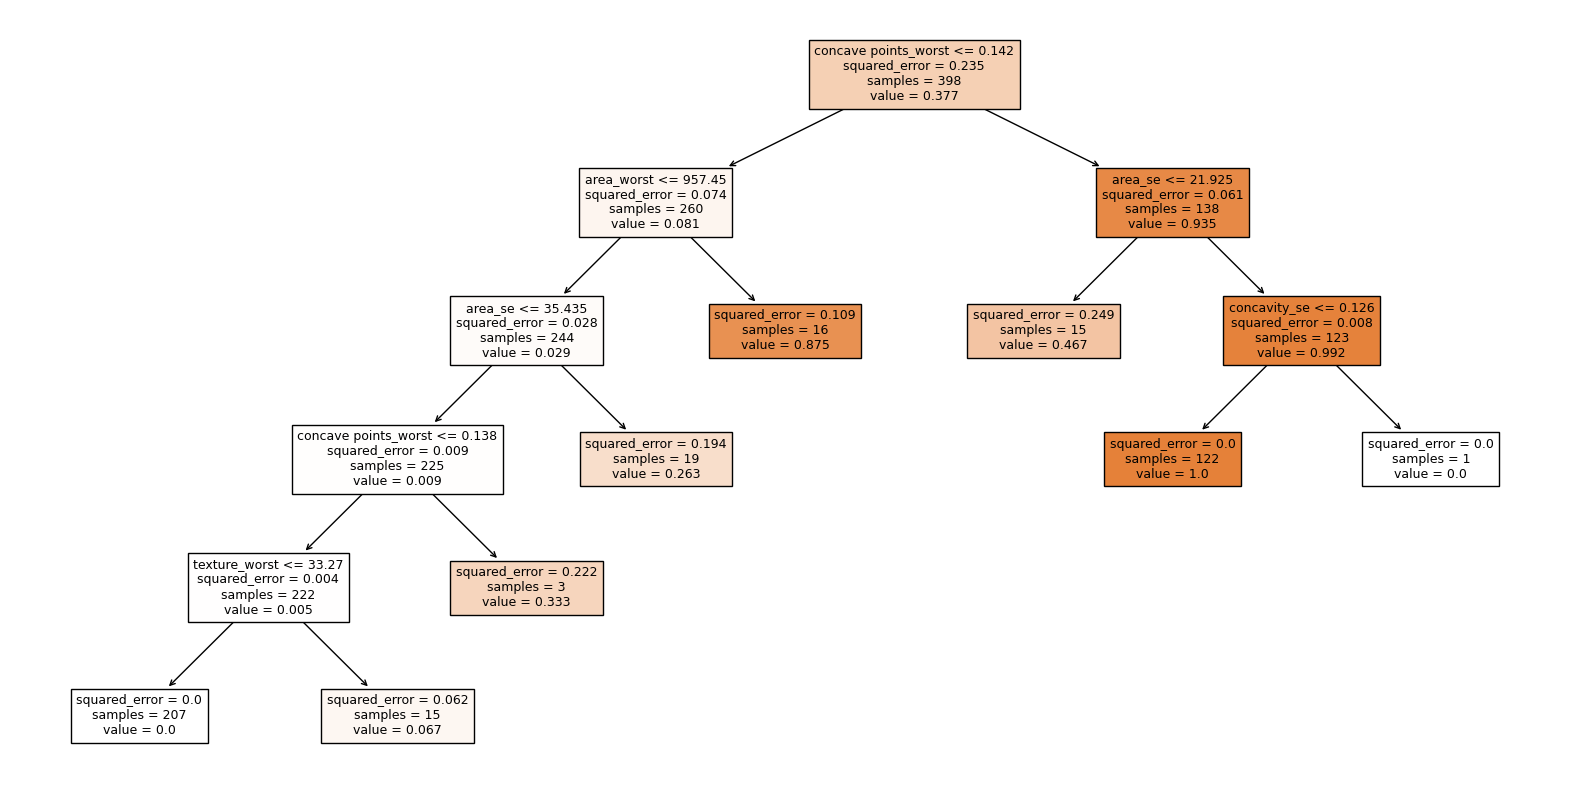

In [40]:
plt.figure(figsize=(20, 10))
plot = tree.plot_tree(
    grid_clf,
    feature_names=X_train.columns.tolist(),
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for p in plot:
    arrow = p.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
plt.show()

In [41]:
# Now, since the tree is little cubmersome to read we can actually print it.

print(tree.export_text(random_clf, feature_names=X_train.columns.tolist(), show_weights=True))

|--- concave points_worst <= 0.14
|   |--- area_worst <= 957.45
|   |   |--- area_se <= 35.44
|   |   |   |--- concave points_worst <= 0.14
|   |   |   |   |--- texture_worst <= 33.27
|   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- texture_worst >  33.27
|   |   |   |   |   |--- value: [0.07]
|   |   |   |--- concave points_worst >  0.14
|   |   |   |   |--- value: [0.33]
|   |   |--- area_se >  35.44
|   |   |   |--- value: [0.26]
|   |--- area_worst >  957.45
|   |   |--- value: [0.88]
|--- concave points_worst >  0.14
|   |--- area_se <= 21.93
|   |   |--- value: [0.47]
|   |--- area_se >  21.93
|   |   |--- smoothness_worst <= 0.10
|   |   |   |--- value: [0.00]
|   |   |--- smoothness_worst >  0.10
|   |   |   |--- value: [1.00]



### Observations from the Decision Tree

1. **Primary Split**: The most important feature for the first split is `concave points_worst`. If it's less than or equal to 0.14, the tree follows the left branch; otherwise, it follows the right branch.

2. **High Prediction for `area_worst`**: If `concave points_worst` is less than or equal to 0.14 and `area_worst` is greater than 957.45, the predicted value is 0.88, indicating a strong prediction for a specific class.

3. **Low Prediction for Small Areas**: When `area_se` is less than or equal to 35.44 and `texture_worst` is less than or equal to 33.27, the prediction is 0.00, suggesting a different class.

4. **Mixed Predictions for `concave points_worst` > 0.14**: For `concave points_worst` greater than 0.14, the tree splits on `area_se` and `smoothness_worst`, resulting in varied predictions (0.47, 0.00, and 1.00).

5. **Specific Conditions**: High specificity in leaf nodes, such as the condition where `concave points_worst` is greater than 0.14, `area_se` is greater than 21.93, and `smoothness_worst` is greater than 0.10, leading to a strong prediction value of 1.00.